In [4]:
from calendar import month

import pandas as pd
monthly = pd.read_csv('housing_in_london_monthly_variables.csv')

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#### The goal is to produce average price by region for all relevant data

In [ ]:
monthly

In [7]:
monthly['area_code'] = monthly['code'].str[:3]

In [ ]:
monthly

In [9]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
 7   area_code      13549 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 846.9+ KB


In [10]:
unique_combinations = monthly[['area', 'area_code']].drop_duplicates()

In [11]:
unique_combinations

,area,area_code
0,city of london,E09
301,barking and dagenham,E09
602,barnet,E09
903,bexley,E09
1204,brent,E09
1505,bromley,E09
1806,camden,E09
2107,croydon,E09
2408,ealing,E09
2709,enfield,E09


In [12]:
monthly = monthly[monthly['borough_flag']!= 1]
areas_to_include = ['E12']
monthly = monthly[monthly['area_code'].isin(areas_to_include)]

In [ ]:
monthly

In [14]:
areas = monthly.groupby('area')['average_price'].mean()

In [15]:
areas

area
east midlands           121649.890365
east of england         171182.229236
london                  265517.425249
north east               97041.076412
north west              108789.574751
south east              196442.129568
south west              163353.252492
west midlands           127102.840532
yorks and the humber    109112.677741
Name: average_price, dtype: float64

<Axes: xlabel='area'>

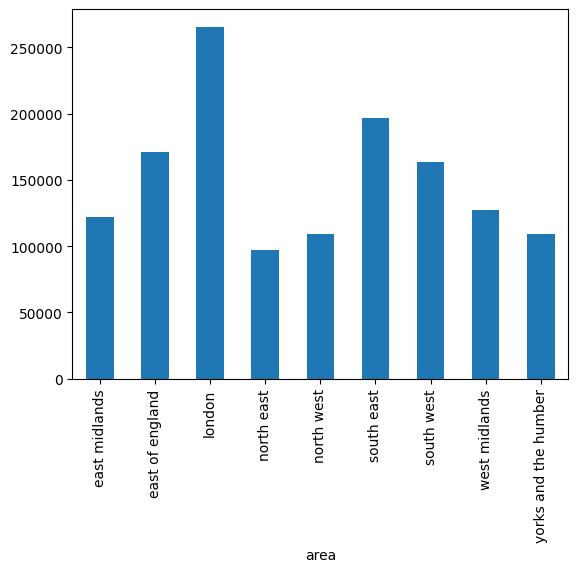

In [17]:
areas.plot(kind='bar')